<a href="https://colab.research.google.com/github/AshOne91/PLAYDATA-COLAB/blob/main/%EC%9E%90%EC%97%B0%EC%96%B4_%EC%B2%98%EB%A6%AC_%EC%A0%84%ED%86%B5%EC%A0%81_%EA%B8%B0%EB%B2%95(NLP_%EA%B7%9C%EC%B9%99%EA%B8%B0%EB%B0%98_%EC%8B%9C%EC%8A%A4%ED%85%9C%2C_NLP_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

트랜스포머 : 2017
```
핵심 알고리즘
  - 셀프 어텐션(self-attention) 매커니즘을 이용해서 시퀀스 전체를 동시에 처리
트래스포머의 구조
  - 인코더 : 입력시퀀스받아서 셀프어텐션과 피드포워드 레이어를 통해 인코딩
  - 디코더 : 인코더에서 나온 정보를 받아서 출력 시퀀스를 예측, 인코더와 마찬가지로 셀프 어텐션과 피드포워드레이어로 구성
```


셀프어텐션 메커니즘
```
입력시퀀스로 들어온 단어가 다른단어와 연관성이 있는지 계산해서 단어간의 관계를 파악
쿼리(Query), 키(Key), 값(Value) 세가지 벡터를 생성 이를 기반으로 가중치를계산

계산과정
1. 각 단어의 쿼리, 키, 값을 생성
2. 쿼리와 키의 내적을 통해 유사도를 계산, softmax통과해서 가중치를 구함
3. 각 단어의 가중치를 적용한 값 벡터를 합산해서 새로운 벡터를 계산
문맥을 고려한 단어 표현을 만들수 있다

```

```
시퀀스투시퀀스 Seq2seq
쿼리 : 모든 시점의디코더 셀에서의 은닉상태
keys,values : 모딘 시점의 인코더 셀에서의 은닉상태
```

In [ ]:
# 라이브러리
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import torch.nn as nn

In [ ]:
# 토크나이져와 모델 로드
# 감성분석용
tokenizer =  BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# 입력 텍스트 준비
text = "This movie is absolutely fantastic"
inputs = tokenizer(text, return_tensors='pt',padding=True, truncation=True, max_length=512)
inputs

{'input_ids': tensor([[  101,  2023,  3185,  2003,  7078, 10392,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
# 모델 예측
model.eval()
with torch.no_grad():
  outputs = model(**inputs)
  logits = outputs.logits  # (1,2)  tensor([[0.4391, 0.1393]])

probs =  nn.functional.softmax(logits,dim=1)  # 확률로 변환
positive_prob = probs[0][1].item()
print(f"긍정적인 확률 : {positive_prob}")
negative_prob = probs[0][0].item()
print(f"부정적인 확률 : {negative_prob}")

긍정적인 확률 : 0.49400898814201355
부정적인 확률 : 0.5059909820556641


In [ ]:
!pip install nltk -q

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import torch.nn as nn

In [ ]:
# 데이터 다운로드
from nltk.corpus import movie_reviews
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
# 데이터 로드
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

In [ ]:
# 단어를 문장으로 결합
texts = [' '.join(tokens) for tokens, label in documents]
labels = [0 if label == 'neg' else 1 for tokens, label in documents]

In [ ]:
# BERT 토크나이져와 사전 학습된 모델을 로드
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# 데이터 전처리
# 텍스트를 BERT 입력 형식으로 변환
inputs = tokenizer(texts,return_tensors='pt',padding=True,truncation=True,max_length=512)
labels = torch.tensor(labels)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
labels_100 =  torch.tensor(labels[950:1050],dtype=torch.long).to(device)
# 입력값은 정수형 텐서
inputs_100 = {
                key:torch.tensor(inputs[key][950:1050], dtype=torch.long).to(device)
                    for key in inputs.keys()
                }

<ipython-input-46-f261a8c09daf>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels_100 =  torch.tensor(labels[950:1050],dtype=torch.long).to(device)
<ipython-input-46-f261a8c09daf>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  key:torch.tensor(inputs[key][950:1050], dtype=torch.long).to(device)


In [ ]:
from tqdm import tqdm
# 학습준비
# BERT모델에는 AdamW가 적합
optimizer = torch.optim.AdamW(model.parameters(),lr=1e-5)

# 학습루프
epochs = 10
batch_size = 8
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
model.train()  # 학습모드활성화
for epoch in range(epochs):
  iterator = tqdm(range(0, 100, batch_size), desc=f'Epoch {epoch+1}')
  for i in iterator:
    batch_inputs = {key:val[i : i + batch_size] for key, val in inputs_100.items()}
    batch_labels = labels_100[i : i +batch_size]
    optimizer.zero_grad()
    outputs = model(**batch_inputs, labels=batch_labels)
    loss = outputs.loss
    loss.backward()
    optimizer.step()
    # 손실값 출력
    iterator.set_postfix({'batch':f'{i//batch_size+1}',   'loss':f'{loss.item():.4f}'})

Epoch 10: 100%|██████████| 13/13 [00:09<00:00,  1.35it/s, batch=13, loss=0.0314]


In [ ]:
# 모델 평가
# classification_report 로드
from sklearn.metrics import classification_report
model.eval()
with torch.no_grad():
  outputs = model(**inputs_100)
  logits = outputs.logits
  probs = nn.functional.softmax(logits,dim=1)
  predicted_labels = torch.argmax(probs,dim=1)
  accuracy = (predicted_labels == labels_100).float().mean()
  print(f"Accuracy : {accuracy.item()}")
  print( classification_report(predicted_labels.cpu(),labels_100.cpu())  )

Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



학습에 참여하지 않은 데이터로 평가

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
test_labes = torch.concat([labels[:50], labels[-50:]]).to(device)
test_inputs =  {
                key: torch.concat([inputs[key][:50], inputs[key][-50:]],dim=0).to(device)
                    for key in inputs.keys()
                }
print(len(test_labes))
from sklearn.metrics import classification_report
model.eval()
with torch.no_grad():
  outputs = model(**test_inputs)
  logits = outputs.logits
  probs = nn.functional.softmax(logits,dim=1)
  predicted_labels = torch.argmax(probs,dim=1)
  accuracy = (predicted_labels == test_labes).float().mean()
  print(f"Accuracy : {accuracy.item()}")
  print( classification_report(predicted_labels.cpu(),labels_100.cpu())  )

100
Accuracy : 0.5899999737739563
              precision    recall  f1-score   support

           0       0.60      0.59      0.59        51
           1       0.58      0.59      0.59        49

    accuracy                           0.59       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.59      0.59      0.59       100



셈플문장을 넣어서 감성분석

In [ ]:
# new_text = 'This movie was boring and a waste of time'
# new_text = "The plot was predictable and lacked excitement"
# new_text = 'This movie is absolutely fantastic!'

new_text = 'The pacing was perfect, keeping me hooked the entire time'
new_input = tokenizer(new_text,return_tensors='pt',padding=True,truncation=True,max_length=512)
model.eval()
with torch.no_grad():
  new_input = new_input.to(device)
  new_outputs = model(**new_input)
  new_logits = new_outputs.logits
  new_probs = nn.functional.softmax(new_logits,dim=1)
  print([prob.item() for prob in new_probs[0] ])

[0.6364400386810303, 0.3635600209236145]


한국어 감성 분석
```
한국어에 특화된 모델 한국어 특화 BERT 모델
bert-base-uncased --> klue/bert-base
데이터
  네이버 영화 리뷰데이터셋
전처리
  한글에 맞게
한글에 맞는 라이브러리    
```

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizerFast #BertTokenizer
# BertTokenizer : 파이썬 기반으로 WordPiece 토큰화 알고리즘
# BertTokenizerFast : Rust 기반으로 작성 tokenizers 라이브러를 기반 좀더 최적화
# 특수토큰 처리에 적합 ,빠른 전처리, 한글과 같은 복잡한 언어에 적합
# 최신 모델과 잘 호환
import torch
import torch.nn as nn
import re
from sklearn.model_selection import train_test_split

In [ ]:
# 데이터 가져오기(네이버 영화 평점)
!wget http://skt-lsl-nlp-model.s3.amazonaws.com/KoBERT/datasets/nsmc/ratings_train.txt
!wget http://skt-lsl-nlp-model.s3.amazonaws.com/KoBERT/datasets/nsmc/ratings_test.txt

--2025-04-23 05:04:47--  http://skt-lsl-nlp-model.s3.amazonaws.com/KoBERT/datasets/nsmc/ratings_train.txt
Resolving skt-lsl-nlp-model.s3.amazonaws.com (skt-lsl-nlp-model.s3.amazonaws.com)... 52.219.202.59, 3.5.184.177, 3.5.184.236, ...
Connecting to skt-lsl-nlp-model.s3.amazonaws.com (skt-lsl-nlp-model.s3.amazonaws.com)|52.219.202.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘ratings_train.txt’

ratings_train.txt   100%[===================>]  13.95M  10.2MB/s    in 1.4s    

2025-04-23 05:04:49 (10.2 MB/s) - ‘ratings_train.txt’ saved [14628807/14628807]

--2025-04-23 05:04:49--  http://skt-lsl-nlp-model.s3.amazonaws.com/KoBERT/datasets/nsmc/ratings_test.txt
Resolving skt-lsl-nlp-model.s3.amazonaws.com (skt-lsl-nlp-model.s3.amazonaws.com)... 52.219.202.59, 3.5.184.177, 3.5.184.236, ...
Connecting to skt-lsl-nlp-model.s3.amazonaws.com (skt-lsl-nlp-model.s3.amazonaws.com)|52.219.202.59|:80... connected.
HTTP request sen

In [ ]:
import pandas as pd
import re
df = pd.read_csv('ratings_train.txt',sep='\t')
# 결측치
df = df.dropna()
# 중복제거
df = df.drop_duplicates()
# 한글 전처리 함수 --> pandas apply적용
def clean_text(text):
  # 한글과 공백을 제외한 문자 제거
  text = re.sub(r'[^ㄱ-ㅎ가-힣\s]','',text)
  text = re.sub(r'\n|\r\n','',text)  # 줄바꿈 제거
  return text.strip()

df['document'] =  df['document'].apply(clean_text)
limit_size = 10000
df = df[:limit_size]
texts = df['document'].tolist()
labels = df['label'].tolist()

In [ ]:
# 토크나이져 와 모델 로드
BertTokenizerFast.from_pretrained('klue/bert-base')
tokenizer = BertTokenizerFast.from_pretrained('klue/bert-base')
model = BertForSequenceClassification.from_pretrained('klue/bert-base',num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


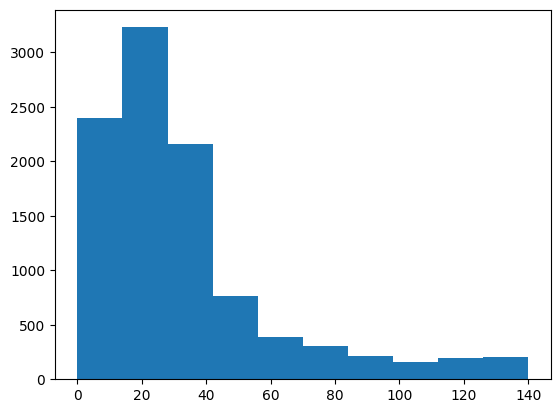

24.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
texts_lens = [len(text) for text in texts]
plt.hist(texts_lens)
plt.show()
print(np.quantile(texts_lens,0.5))

In [ ]:
# 한국에 텍스트를 BERT 입력 형식으로 변환
inputs = tokenizer(texts,return_tensors='pt',padding=True,truncation=True,max_length=60)
labels = torch.tensor(labels)

<ipython-input-19-30e7fdfbd267>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)


In [ ]:
# 모델 학습
# 학습루프
from tqdm import tqdm
epochs = 10
batch_size = 16
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
# 데이터를 device
inputs = {key:val.to(device) for key, val in inputs.items()}
labels = labels.to(device)
optimizer = torch.optim.AdamW(model.parameters(),lr=2e-5)
model.train()  # 학습모드활성화
for epoch in range(epochs):
  iterator = tqdm(range(0, limit_size, batch_size), desc=f'Epoch {epoch+1}')
  for i in iterator:
    batch_inputs = {key:val[i : i + batch_size] for key, val in inputs.items()}
    batch_labels = labels[i : i +batch_size]
    optimizer.zero_grad()
    outputs = model(**batch_inputs, labels=batch_labels)
    loss = outputs.loss
    loss.backward()
    optimizer.step()
    # 손실값 출력
    iterator.set_postfix({'batch':f'{i//batch_size+1}',   'loss':f'{loss.item():.4f}'})

Epoch 10: 100%|██████████| 625/625 [01:51<00:00,  5.59it/s, batch=625, loss=0.0007]


In [ ]:
new_text = '짱이다'
new_input = tokenizer(new_text,return_tensors='pt',padding=True,truncation=True,max_length=512)
model.eval()
with torch.no_grad():
  new_input = new_input.to(device)
  new_outputs = model(**new_input)
  new_logits = new_outputs.logits
  new_probs = nn.functional.softmax(new_logits,dim=1)
  print([prob.item() for prob in new_probs[0] ])
  # [0.00015741914103273302, 0.9998425245285034]

NameError: name 'tokenizer' is not defined

테스트 데이터로 평가

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

df = pd.read_csv('ratings_test.txt',sep='\t')
# 전처리
df = df.dropna()
df = df.drop_duplicates()
df['document'] =  df['document'].apply(clean_text)
limit_size = 500
df = df[:limit_size]
texts = df['document'].tolist()
labels = df['label'].tolist()

# 토크나이져 와 모델 로드
BertTokenizerFast.from_pretrained('klue/bert-base')
tokenizer = BertTokenizerFast.from_pretrained('klue/bert-base')

# 한국에 텍스트를 BERT 입력 형식으로 변환
inputs = tokenizer(texts,return_tensors='pt',padding=True,truncation=True,max_length=60)
labels = torch.tensor(labels)

# 평가
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.eval()
with torch.no_grad():
  inputs = {key:val.to(device) for key, val in inputs.items()}
  labels = labels.to(device)
  outputs = model(**inputs)
  logits = outputs.logits
  probs = nn.functional.softmax(logits,dim=1)
  predicted_labels = torch.argmax(probs,dim=1)
  accuracy = (predicted_labels == labels).float().mean()
  print( classification_report(predicted_labels.cpu(),labels.cpu())  )


              precision    recall  f1-score   support

           0       0.79      0.87      0.83       218
           1       0.89      0.83      0.86       282

    accuracy                           0.84       500
   macro avg       0.84      0.85      0.84       500
weighted avg       0.85      0.84      0.84       500

